# Linear Regression

## Import Iris dataset  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [2]:
from sklearn import datasets 
iris = datasets.load_iris() 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Analysis dataset

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
X_all = iris.data 
X_all[:3] # 샘플 3개

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

## Regression

Iris dataset은 feature를 이용해 classification을 하기 위한 dataset이지만, 여기서는 regression을 연습해보기 위해 두 개의 feature 간의 관계를 본다. 

### Split train/test dataset

In [6]:
X = X_all[:, 0] # 첫번째 feature(sepal length) -> feature
y = X_all[:, 2] # 세번째 feature(petal length) -> label
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

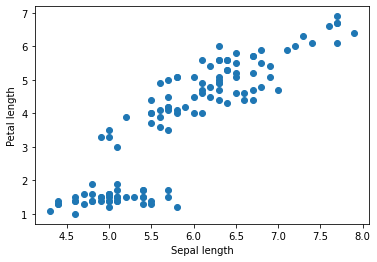

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

### Select model and Train/Evaluate

In [8]:
from sklearn.linear_model import LinearRegression 
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Train Score : {:.3f}".format(linr.score(X_train.reshape(-1,1), y_train)))
print("Test Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

Train Score : 0.776
Test Score : 0.655


In [9]:
print(linr.coef_, linr.intercept_) # w, b

[1.8699969] -7.233315234253802


### Plotting

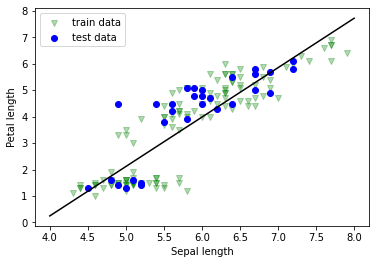

In [18]:
plt.scatter(X_train, y_train, marker='v', c='g', alpha=0.3) 
plt.scatter(X_test, y_test, marker='o', c='b') 
plt.legend(['train data', 'test data'])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

xx = np.linspace(4, 8, 3)
plt.plot(xx, linr.coef_ * XX + linr.intercept_, "k-")

## KFold() Cross Validation 

In [11]:
X = X_all[:,0]
y = X_all[:,2]

cv = KFold(n_splits=5, shuffle=True)  # Returns the number of splitting iterations in the cross-validator.
score = cross_val_score(LinearRegression(), X.reshape(-1,1), y, cv=cv)

print(score.round(2))
print(score.mean().round(2))

[0.83 0.71 0.8  0.72 0.62]
0.74


### What is cv?

In [12]:
print(cv)
print(cv.get_n_splits(X))

KFold(n_splits=5, random_state=None, shuffle=True)
5


In [13]:
for train_index, test_index in cv.split(X):
    print("TRAIN:\n", train_index,'\n', "TEST:\n", test_index)
    # X_train, X_test = X[train_index], X[test_index]
    # y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  17  18  19
  21  22  23  24  27  28  30  31  32  33  34  35  36  37  38  39  40  43
  44  45  46  47  48  50  51  58  59  60  61  62  63  64  65  66  67  68
  70  71  74  75  76  78  79  80  83  84  85  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 128 129 130 131 132
 133 134 135 136 137 138 140 141 142 143 145 146] 
 TEST:
 [ 15  16  20  25  26  29  41  42  49  52  53  54  55  56  57  69  72  73
  77  81  82  86  87 110 127 139 144 147 148 149]
TRAIN:
 [  1   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  28  29  30  31  32  33  34  35  37  39  40  41  42
  44  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62  64  66
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  85  86  87
  88  89  90  91  92  93  94  99 101 103 104 105 106 107 108 110 111 112

### Using Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train.reshape(-1,1), y_train) 
print(dec_reg.score(X_test.reshape(-1,1), y_test))

0.6603935908495113


## Example: Weight Prediction

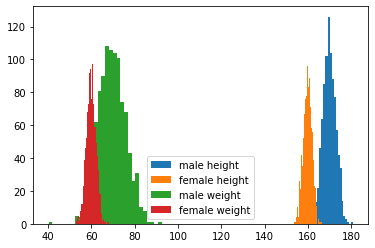

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170 # 남자 평균 키: 평균 170cm
x2 = 2*np.random.randn(n_samples) + 160 # 여자 평균 키: 평균 160cm

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 남자 평균 몸무게: 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples)   # 여자 평균 몸무게: 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.legend(['male height','female height','male weight','female weight'])
plt.show()

### Regression (Male)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.97565925]
0.8862823762936953


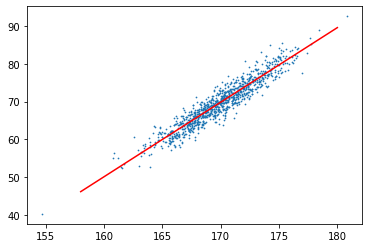

In [17]:
xs = np.linspace(158, 180, 100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

### Regression (Female)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[0.95762519] -93.25716014459344
0.7811144757134837


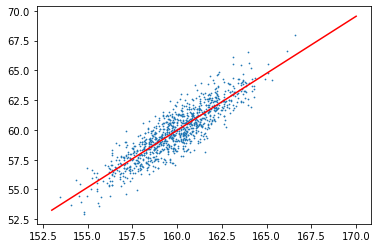

In [19]:
xs = np.linspace(153,170,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

### Put together

In [20]:
x = np.concatenate((x1, x2)) # height
y = np.concatenate((y1, y2)) # weight

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.12412902] -120.65716664249534
0.8661394258410994


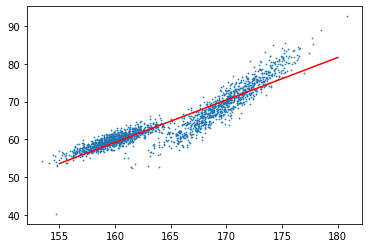

In [21]:
xs = np.linspace(155,180,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x, y, s=0.5)
plt.plot(xs, ys, c='r')

이제 또 다른 feature인 성별(sex)을 추가합니다. (남성: 0, 여성: 1)

In [23]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)  # 기존 인덱스 무시

In [25]:
X.tail()

,height,sex
1995,161.146802,1
1996,163.119257,1
1997,162.636058,1
1998,158.707191,1
1999,162.973439,1


In [26]:
y[-5:]

array([58.88423466, 64.33716441, 62.17561683, 58.41011795, 63.16367387])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_, leg.intercept_)
print(leg.score(X_test, y_test))

[1.63928026 6.61791468] -208.8747597065423
0.9114219618981279


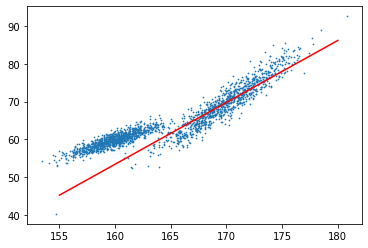

In [28]:
xs = np.linspace(155,180,100)
ys = xs * leg.coef_[0] + leg.intercept_
plt.scatter(x, y, s=0.5)
plt.plot(xs, ys, c='r')

위의 결과를 보면 1.64 * zl + 6.8 * 성별 - 208.87 의 선형 모델을 구성하였고 score 는 91.14 % 로 향상되었다. 

따라서 샘플을 잘 나타낼 수 있는 특성의 존재가 중요하다는 것을 알 수 있습니다. 

### K-Fold Cross validation

In [29]:
from sklearn.model_selection import cross_val_score, KFold

In [30]:
X_train[:10], X_train.shape

(          height  sex
 587   173.944230    0
 430   167.736193    0
 1036  156.342449    1
 915   170.328382    0
 882   171.051937    0
 616   166.261309    0
 824   168.613844    0
 1139  163.772106    1
 1882  160.215457    1
 507   174.937861    0,
 (1600, 2))

In [31]:
cv = KFold(n_splits=10, shuffle=True) # Whether to shuffle the data before 
                                      # splitting into batches.
score = cross_val_score(leg, X, y, cv=cv)
score, score.mean()

(array([0.91759803, 0.89931156, 0.92239057, 0.91557126, 0.88631079,
        0.90778426, 0.91583067, 0.93319071, 0.9110912 , 0.9053706 ]),
 0.9114449645774002)

### Using Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print("Train score: {}".format(dec_reg.score(X_train, y_train)))
print("Test score: {}".format(dec_reg.score(X_test, y_test)))

Train score: 0.9999815827752151
Test score: 0.8828025335653601


In [33]:
X_train[:5]

,height,sex
587,173.944230,0
430,167.736193,0
1036,156.342449,1
915,170.328382,0
882,171.051937,0


In [34]:
y_train[:5]

array([79.4681088 , 66.19980307, 55.72777866, 66.07051419, 71.06719905])